In [1]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os
import argparse

script_n = 'pfs_density_connectivity_combined_210420'

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData

import compress_pickle
db_f = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/pfs_density_db_210306.gz'
pf_db = compress_pickle.load(db_f)

mpd = MyPlotData()
n = 0

for block in pf_db:
    if 'density' not in pf_db[block]:
        continue
    if block == 'x84y50':
        continue
    mpd.add_data_point(
        y=pf_db[block]['y_dist'],
        density=pf_db[block]['density'],
    )
    n+=1

print(f'n={n}')


n=47


In [2]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os
import argparse

# script_n = 'pfs_connectivity_ratio_210306'

sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData

max_dist = 150
threshold = 6

from weight_database import WeightDatabase
weightdb = WeightDatabase()

# weightdb.load_syn_db('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/pfs/gen_201224_setup01_syndb_threshold_10_coalesced.gz')
weightdb.load_syn_db('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/pfs/gen_210101_setup01_syndb_threshold_10_coalesced_filtered_10.gz')
weightdb.load_touch_db(
    '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/purkinje/db_pf_contacts_201224.gz',
    max_dist=max_dist
    )

In [10]:
import compress_pickle
db_f = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/pfs_density_db_210306.gz'
pf_db = compress_pickle.load(db_f)

mpd = MyPlotData()
n_pfs = 0
avgs = []
densities = []

for block in pf_db:
    block_pfs = pf_db[block]['pfs']
    if len(block_pfs) == 0:
        continue
    rates = []
    for pf in block_pfs:
        n_pfs += 1
        rate = weightdb.calc_connection_rate(pf)
        rates.append(rate)
    avg = sum(rates) / len(rates)
    avgs.append(avg)
    densities.append(pf_db[block]['density'])
#     print(f'{block}: {avg}')
    mpd.add_data_point(
        y=pf_db[block]['y_dist'],
        rate=avg*100,
        density=pf_db[block]['density'],
    )

print(f'n_pfs = {n_pfs}')

n_pfs = 4420


In [4]:
average density: 3.7030876767301093
average density: 3.7260130709318986

SyntaxError: invalid syntax (<ipython-input-4-e04334150dd7>, line 1)

In [12]:
import statistics
print(statistics.mean(densities))
print(statistics.stdev(densities))

3.726013070931898
1.2253857820155172


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=df, x='y', y='density', color="g",
#             ylim=[0, 8],
            
            )
ax2 = plt.twinx()
sns.lineplot(data=df, x='y', y='rate', color="b", ax=ax2)

NameError: name 'df' is not defined

Height: 3.007518796992481, Aspect: 1.33
Height: 3.007518796992481, Aspect: 1.33


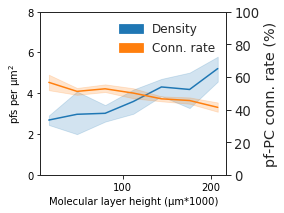

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


script_n = 'pfs_density_connectivity_combined_210420'

plt.subplots(figsize=(3.33, 3))

importlib.reload(my_plot); ax = my_plot.my_lineplot(
    mpd,
    x="y",
    y="density",
    color=sns.color_palette()[0],
    ylim=[0, 8],
    context='paper',
    width=4,
    y_axis_label='pfs per µm$\mathregular{^{2}}$',
    x_axis_label='Molecular layer height (µm*1000)',
    save_filename=f'{script_n}_line.svg',
    no_show=True,
)
ax2 = plt.twinx()
importlib.reload(my_plot); my_plot.my_lineplot(
    mpd,
    x="y",
    y="rate",
    color=sns.color_palette()[1],
    ylim=[0, 100],
    context='paper',
    width=4,
    ax=ax2,
#     legend=True,
    y_axis_label='pf-PC conn. rate (%)',
    x_axis_label='Molecular layer height (µm*1000)',
    save_filename=f'{script_n}_line.svg',
#     show=True,
    no_show=True,
)
# ax.figure.legend()
# plt.legend()

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color=sns.color_palette()[0], label='Density')
black_patch = mpatches.Patch(color=sns.color_palette()[1], label='Conn. rate')
# plt.legend(handles=[red_patch, black_patch])
plt.legend(loc='top right', frameon=False, fontsize=12, handles=[red_patch, black_patch])
# plt.legend(labels=['legendEntry1', 'legendEntry2'])

plt.savefig(f'{script_n}_line.svg', bbox_inches='tight', transparent=True)
plt.show()
plt.close()

In [7]:
df.y

NameError: name 'df' is not defined